Иерархический кластерный анализ. Практика
=============

Видеоматериал на YouTube (Вадим Аббакумов) [[ЛЕКЦИЯ_4]](https://www.youtube.com/watch?v=eDi8r-cI5d8&list=PLi7wcJNcND_a-RRHCh7BC3Ibj4J-t7FYu&index=4)


Полезные ссылки:
* https://docs.scipy.org/doc/scipy-0.14.0/reference/cluster.hierarchy.html
* https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
* http://scikit-learn.org/stable/modules/clustering.html

Пример 1. Beverage
--------

In [2]:
#  Активируем библиотеки

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os

In [19]:
#  Импорт данных

#  Новая опция: index_col
#  Указывает, какую колонку в данных использовать как индекс

df = pd.read_csv("data_lesson_4\\beverage.csv", sep=";", index_col='numb.obs')

#  Для проверки выведем первые 5 строк
df.head()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
numb.obs,,,,,,,,
1,1,0,0,0,1,1,0,1
2,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0
4,0,1,0,1,0,0,1,0
5,1,0,0,0,1,0,0,0


In [7]:
# Так как файлик маленький можем посмотреть на него целиком
print(df)

          COKE  D_COKE  D_PEPSI  D_7UP  PEPSI  SPRITE  TAB  SEVENUP
numb.obs                                                           
1            1       0        0      0      1       1    0        1
2            1       0        0      0      1       0    0        0
3            1       0        0      0      1       0    0        0
4            0       1        0      1      0       0    1        0
5            1       0        0      0      1       0    0        0
6            1       0        0      0      1       1    0        0
7            0       1        1      1      0       0    1        0
8            1       1        0      0      1       1    0        1
9            1       1        0      0      0       1    1        1
10           1       0        0      0      1       0    0        1
11           1       0        0      0      1       1    0        0
12           0       1        0      0      0       0    1        0
13           0       0        1      1      0   

Вопрос для самопроверки.

Нужно ли стандартизовать данные?

In [9]:
#  Активируем 3 процедуры иерархического кластерного анализа
#  Эта ячейка обычно вторая в скрипте

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


Для проведения иерархического кластерного анализа  <br>
используем команду linkage из библиотеки scipy. 

Три аргумента этой команды: <br>
таблица данных,  <br>
способ вычисления расстояний между кластерами (```ward```, ```single```(default), ```complete```, ```average```, ```weighted```, ```centroid```, ```median```, ```weighted```)  <br>
и способ вычисления расстояний между объектами (```euclidean``` (default), ```cityblock```, ```hamming```, ```cosine```).   <br>
См. [документацию]( https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html).


In [10]:
#  Кластеризуем
link = linkage(df, 'ward', 'euclidean')

В объекте ```link```  хранится история объединения кластеров. Это матрица numpy ```(n-1) x 4```, где ```n``` -- число наблюдений. Каждая строка матрицы описывает слияние очередной пары кластеров с номерами ```link[i, 0]``` и ```link[i, 1]```. Новому кластеру присваивается номер ```n + i```. Столбец ```link[i, 2]``` содержит расстояние между объединяемыми кластерами, а ```link[i, 3]``` -- объем нового кластера.

In [11]:
#  link точно матрица numpy? 

print(type(link))
print(link.shape)

<class 'numpy.ndarray'>
(33, 4)


In [11]:
#  Посмотрим на содержимое link 
link

#  Почему расстояния равны 0?

#  Чтобы просмотреть только первые 15 строк матрицы link
# link[:15]

array([[ 5.        , 10.        ,  0.        ,  2.        ],
       [ 1.        ,  2.        ,  0.        ,  2.        ],
       [ 4.        , 35.        ,  0.        ,  3.        ],
       [ 3.        , 22.        ,  0.        ,  2.        ],
       [20.        , 36.        ,  0.        ,  4.        ],
       [ 6.        , 33.        ,  0.        ,  2.        ],
       [ 9.        , 30.        ,  0.        ,  2.        ],
       [13.        , 28.        ,  0.        ,  2.        ],
       [32.        , 40.        ,  0.        ,  3.        ],
       [17.        , 23.        ,  0.        ,  2.        ],
       [11.        , 26.        ,  0.        ,  2.        ],
       [14.        , 29.        ,  0.        ,  2.        ],
       [25.        , 37.        ,  0.        ,  3.        ],
       [31.        , 45.        ,  0.        ,  3.        ],
       [21.        , 38.        ,  0.        ,  5.        ],
       [ 0.        ,  7.        ,  1.        ,  2.        ],
       [18.        , 27.

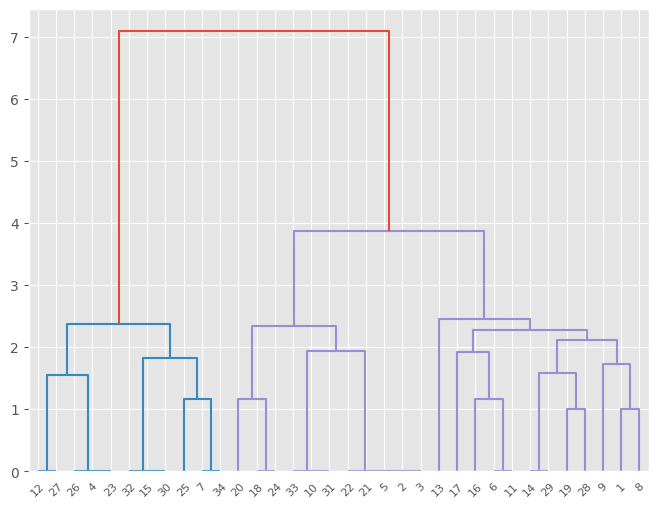

In [12]:
# Построим дендрограмму. Вариант 1
#  Пороговое значение определяется убого, 
#  по формуле h = 0.7*max(link[:,2]).

fig = plt.figure(figsize=(8,6))
dn = dendrogram(link, labels= df.index.tolist())

Алгоритм подкрасил два кластера в дендрограмме, но я предпочитаю ответ три кластера. 

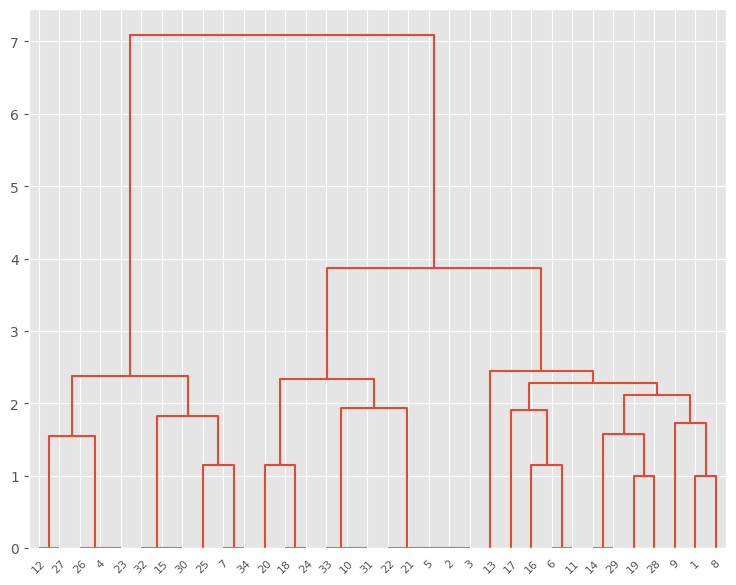

In [13]:
# Построим дендрограмму. Вариант 2
#  Убираем автоматическое определение числа кластеров
fig = plt.figure(figsize=(9,7))
dn = dendrogram(link, color_threshold = -1,                 
                # массив с названиями объектов для подписи по оси X
                labels=df.index.tolist())


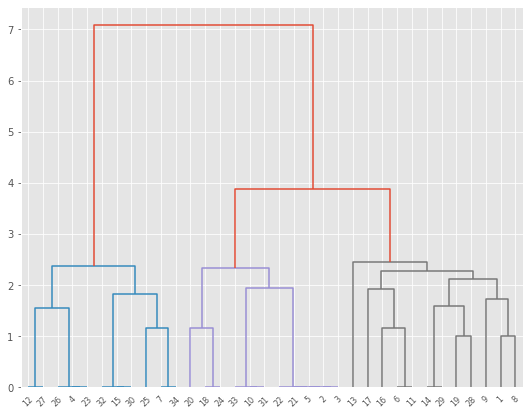

In [19]:
# Построим дендрограмму. Вариант 3
#  Сами задаем порог для расстояния = 3.1, цветом выделяются 3 кластера


fig = plt.figure(figsize=(9,7))

dn = dendrogram(link, color_threshold = 3.1, labels=df.index.tolist())

#  Еще варианты
#  dn = dendrogram(link, orientation = "right")
#  dn = dendrogram(link, labels= df.index.tolist())


Добавим к таблице данных df столбец ```cluster```, содержащий код того кластера, в который попал объект. Это сделаем с помощью команды ```fcluster```. <br>
Первый аргумент команды это объект ```link```, содержащий результаты кластеризации.  <br>
Третий аргумент ```criterion``` указывает, как разбивать на кластеры (```distance```, если остановка объединений по расстоянию между кластерами или ```maxclust```, если будет заданно число кластеров).  <br>
Вторым  аргументом является либо пороговое значение для расстояния между кластерами, либо количество кластеров, в зависимости от значения аргумента ```criterion```.

In [14]:
# Информация о кластерах добавляется в таблицу данных в виде столбца

# Останавливаем объединение, когда расстояние между кластерами превысит 3.1
df['cluster'] = fcluster(link, 3.1, criterion='distance')


# Останавливаем объединение, когда останется 3 кластера
#   df['cluster'] = fcluster(link, 3, criterion='maxclust')



In [15]:
#  Все хорошо?
print(df)

          COKE  D_COKE  D_PEPSI  D_7UP  PEPSI  SPRITE  TAB  SEVENUP  cluster
numb.obs                                                                    
1            1       0        0      0      1       1    0        1        3
2            1       0        0      0      1       0    0        0        2
3            1       0        0      0      1       0    0        0        2
4            0       1        0      1      0       0    1        0        1
5            1       0        0      0      1       0    0        0        2
6            1       0        0      0      1       1    0        0        3
7            0       1        1      1      0       0    1        0        1
8            1       1        0      0      1       1    0        1        3
9            1       1        0      0      0       1    1        1        3
10           1       0        0      0      1       0    0        1        2
11           1       0        0      0      1       1    0        0        3

Вопрос для самопроверки.

На дендрограмме видим левый, центральный и правый кластеры

В таблице видим коды кластеров "1", "2" и "3"

Как соответствуют друг другу кластеры?

Сравним типичные объекты в разных кластерах.
Посмотрим, по каким переменным различаются кластеры.

Для этого сгруппируем данные по номеру кластера, а затем в каждой группе вычислим средние значения каждой характеристики. <br>
Используем стандартную конструкцию: вызов метода ```groupby``` с последующим применением функции к группам.

In [17]:
df.groupby('cluster').mean()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster,,,,,,,,
1,0.00,1.000000,0.545455,0.545455,0.000000,0.000000,0.909091,0.000000
2,1.00,0.272727,0.090909,0.000000,1.000000,0.000000,0.000000,0.272727
3,0.75,0.250000,0.083333,0.083333,0.416667,0.916667,0.083333,0.500000


Два способа посчитать, сколько наблюдений попало в каждый кластер. 


In [16]:
#  1 вариант. Применяем вызов groupy, затем метод size.
df.groupby('cluster').size()

cluster
1    11
2    11
3    12
dtype: int64

In [17]:
#  2 вариант. Другой способ - сколько раз встретилось значение?
print(df['cluster'].value_counts())

cluster
3    12
2    11
1    11
Name: count, dtype: int64


In [18]:
#  Какие наблюдения попали в 1-й кластер?
df[df['cluster']==1].index.values


array([ 4,  7, 12, 15, 23, 25, 26, 27, 30, 32, 34], dtype=int64)

Вопрос для самопроверки. <br>
Что изменится, если выберем вариант решения с 2 кластерами?

In [23]:
df.groupby(fcluster(link, 2, criterion='maxclust')).mean()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP,cluster
1,0.000000,1.00000,0.545455,0.545455,0.000000,0.000000,0.909091,0.000000,1.000000
2,0.869565,0.26087,0.086957,0.043478,0.695652,0.478261,0.043478,0.391304,2.521739


**Каменистая осыпь, она же локоть**

График, помогающий определить число кластеров. Особенно полезен, если данных много. 
Будем использовать второй столбец матрицы ```link``` где  хранятся расстояния между объединяемыми кластерами. 

In [21]:
dist = link[:, 2]
dist

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 1.        , 1.15470054, 1.15470054, 1.15470054,
       1.54919334, 1.58113883, 1.73205081, 1.82574186, 1.91485422,
       1.93649167, 2.12132034, 2.27636073, 2.33711814, 2.37920282,
       2.446395  , 3.87646865, 7.09212963])

На графике "Каменистая осыпь" показывается зависимость расстояний между кластерами от шага объединения (обратного). На графике находим момент, начиная с которого расстояние перестанет значительно меняться.

Text(0, 0.5, 'Расстояние')

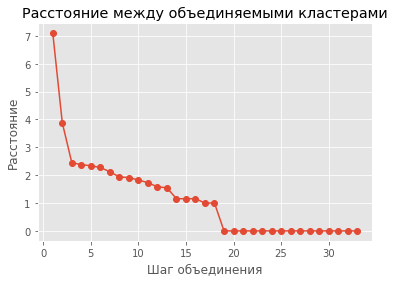

In [22]:
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')

Из картинки видно, что если мы остановим объединение кластеров при расстоянии равном примерно 2.5, мы получим 4 кластера, а при равном 3.1 -- 3 кластера.

В случае больших данных график стоит модифицировать. Рекомендуется показывать на графике не все слияния, а только несколько последних. 

Чтобы автоматизировать процесс, факт сильного изменения расстояний между кластерами можно фиксировать с помощью "производной": там где график выходит на горизонталь, "производная" станет почти нулём.

Пример 2. Кластеризация претендентов.
----------------------

In [24]:
os.chdir("C:/Users/USER/Documents/Python/_AD_Python_part_1_Lectures/AD_Python_1_02_cluster/2_pretendent")

In [25]:
df = pd.read_csv('assess.dat', sep='\t', index_col='NAME')
df.head()

,NR,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
NAME,,,,,,,,,,,
Volker,1,10,10,9,10,10,10,9,10,10,9
Sigrid,2,10,10,4,10,5,5,4,5,4,3
Elmar,3,5,4,10,5,10,4,10,5,3,10
Peter,4,10,10,9,10,10,10,9,10,10,9
Otto,5,4,3,5,4,3,10,4,10,10,5


In [26]:
# удаляю столбцы, которые не нужны для кластеризации

# В столбце NR находится номер объекта, 
# столбец неинформативен, удаляем 
del df['NR']

Вопрос для самопроверки.

Нужно ли стандартизовать данные?

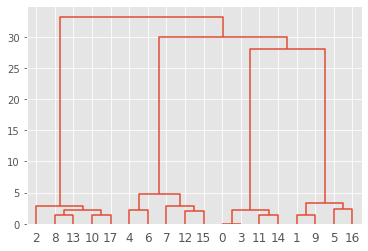

In [28]:
# строю дендрограмму

link = linkage(df, 'ward', 'euclidean')
dn = dendrogram(link, color_threshold = -1)

Вывод: число кластеров равно 4.  <br>
Переходим к интерпретации кластеров

In [30]:
#  Добавляем столбец cluster к таблице данных
df['cluster'] = fcluster(link, 4, criterion='maxclust')

In [31]:
#  Средние значения баллов в каждом кластере
df.groupby('cluster').mean()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
cluster,,,,,,,,,,
1,4.2,4.8,10.00,4.4,10.00,4.4,10.00,4.00,3.80,10.00
2,4.8,4.4,4.00,4.0,4.20,10.0,4.40,10.00,10.00,5.00
3,10.0,10.0,9.00,10.0,10.00,9.5,9.25,9.75,10.00,9.50
4,10.0,10.0,4.25,10.0,4.75,4.5,3.75,4.25,4.25,4.25


Пример 3. Потребление протеинов в Европе.
------------------

In [17]:
os.chdir("C:/Users/USER/Documents/Python/_AD_Python_part_1_Lectures/AD_Python_1_02_cluster/3_Protein Consumption in Europe")


In [18]:
df = pd.read_csv('Protein Consumption in Europe.csv', sep=';', decimal=',', index_col='Country')
df.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


Вопрос для самопроверки.

Нужно ли стандартизовать данные?

Стандартизация данных
--------------------
В этом примере данные измерены в одной шкале, в одних и тех же единицах, но значения в разных столбцах различаются почти на два порядка.

Вывод: данные надо стандартизировать. 

В модуле preprocessing библиотеки sklearn реализованы несколько классов стандартизации данных:
* StandardScaler -- приведение к нулевому среднему и единичной дисперсии.
* MinMaxScaler -- приведение данных к отрезку [0, 1].
* MaxAbsScaler -- приведение к [-1, 1] (рекомендуется для разреженных данных).

Замечание. У этих методов есть методы-аналоги ```scale```, ```minmax_scale``` и ```maxabs_scale```, которые делают практически то же самое, но в задачах распознавания, которые встретяся позже, удобнее использовать именно рассматриваемый вариант.

Процесс стандартизации выглядит так:

In [19]:
from sklearn import preprocessing

# Выбираем один из вариантов стандартизации

stand_1 = preprocessing.StandardScaler()
# stand_1 = preprocessing.MaxAbsScaler()
# stand_1 = preprocessing.MinMaxScaler()

# вычисляем параметры стандартизации (они сохраняются внутри объекта norm)
stand_1.fit(df)
# преобразуем данные
X = stand_1.transform(df)
# Получаем объект X -- матрицу класса numpy.ndarray.
# Преобразуем её в объект класса pandas.DataFrame.
X = pd.DataFrame(X, index=df.index, columns=df.columns)

In [20]:
#  Все хорошо?
X.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,0.082941,-1.794750,-2.224584,-1.179570,-1.225033,0.934804,-2.295965,1.247968,-1.378251
Austria,-0.282974,1.686446,1.245621,0.400468,-0.655111,-0.395051,-0.422218,-0.910790,0.092789
Belgium,1.119699,0.387905,1.062979,0.055732,0.064791,-0.525246,0.889405,-0.499598,-0.076947
Bulgaria,-0.618396,-0.523837,-1.220051,-1.265754,-0.925074,2.273959,-1.983674,0.322786,0.036210
Czechoslovakia,-0.039031,0.968104,-0.124197,-0.662467,-0.685107,0.190830,0.452198,-1.013588,-0.076947


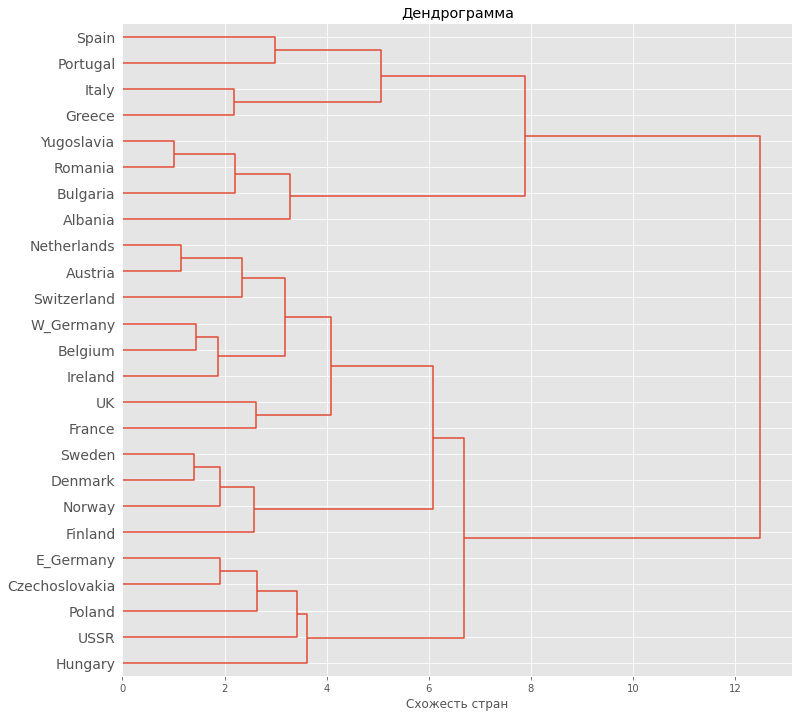

In [21]:
#  кластерный анализ

link = linkage(X, 'ward', 'euclidean')
fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(111)
ax1.set_xlabel('Схожесть стран')

ax1.set_title('Дендрограмма')

dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels=X.index.tolist(),
                leaf_font_size = 14, 
                # опция для красивого отображения слишком ветвистой дендрограммы
                truncate_mode='lastp',
                color_threshold=-1,
                # повернуть подписи вертикально
                orientation = "right",
                leaf_rotation=0.)

#   plt.savefig('dendro_3ex.png', dpi=300, facecolor = 'white')

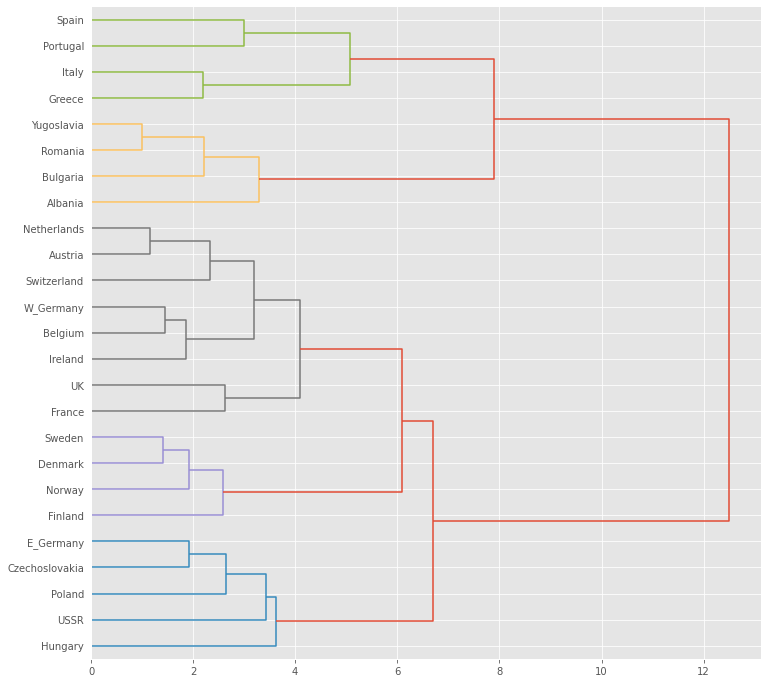

In [36]:
#  Кластеризуем и строим дендрограмму

link = linkage(X, 'ward', 'euclidean')

fig = plt.figure(figsize=(12,12))
dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels=X.index.tolist(),
                # опция для более красивого отображения слишком ветвистой дендрограммы
                truncate_mode='lastp',
                # повернуть подписи вертикально
                color_threshold=5.5,
                orientation = "right",
                leaf_rotation=0.)

Обратите внимание, как подписывать имена объектов

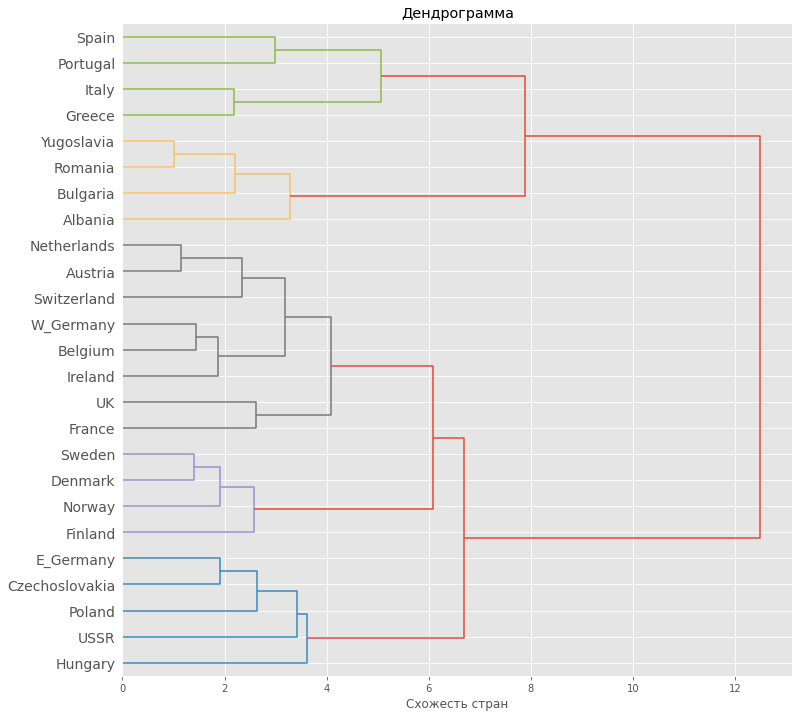

In [37]:
#  Изменим размер подписей объектов

link = linkage(X, 'ward', 'euclidean')
fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(111)
ax1.set_xlabel('Схожесть стран')

ax1.set_title('Дендрограмма')

dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels=X.index.tolist(),
                leaf_font_size = 14, 
                # опция для красивого отображения слишком ветвистой дендрограммы
                truncate_mode='lastp',
                # повернуть подписи вертикально
                color_threshold=5.5,
                orientation = "right",
                leaf_rotation=0.)

In [38]:
df['cluster'] = fcluster(link, 5.5, criterion='distance')

In [39]:
df.groupby('cluster').mean()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
cluster,,,,,,,,,
1,7.9200,10.0400,2.8400,13.8400,2.740,35.740,5.560,2.5400,4.260
2,9.8500,7.0500,3.1500,26.6750,8.225,22.675,4.550,1.1750,2.125
3,13.2125,10.6375,3.9875,21.1625,3.375,24.700,4.650,2.0625,4.175
4,7.1250,4.6750,1.2000,9.4500,0.750,51.125,1.950,5.0500,2.975
5,8.1250,3.8000,2.4750,11.2000,7.625,33.675,3.975,5.6750,7.075


In [40]:
#  Какие страны попали в 5-й кластер?
df[df['cluster']==5].index.values

array(['Greece', 'Italy', 'Portugal', 'Spain'], dtype=object)

In [41]:
#  Какие страны попали в 4-й кластер?
df[df['cluster']==4].index.values

array(['Albania', 'Bulgaria', 'Romania', 'Yugoslavia'], dtype=object)

In [42]:
#  Надоело, выводим состав кластеров сразу для всей выборки
df['cluster'].sort_values()

Country
Poland            1
USSR              1
Czechoslovakia    1
E_Germany         1
Hungary           1
Sweden            2
Norway            2
Denmark           2
Finland           2
Netherlands       3
W_Germany         3
France            3
UK                3
Switzerland       3
Belgium           3
Austria           3
Ireland           3
Albania           4
Yugoslavia        4
Romania           4
Bulgaria          4
Portugal          5
Greece            5
Spain             5
Italy             5
Name: cluster, dtype: int32

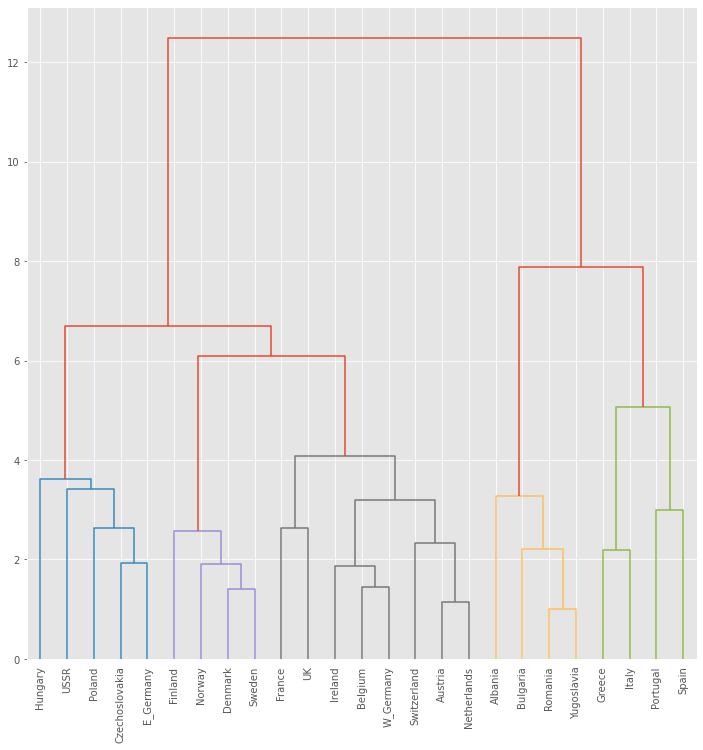

In [43]:
#   Можно, конечно строить дендрограмму и так...

fig = plt.figure(figsize=(12,12))
dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels=X.index.tolist(),
                # опция для сокращения слишком ветввистой дендрограммы
                # сейчас не работает, так как по умолчанию  p=30
                truncate_mode='lastp',
                # повернуть подписи вертикально
                color_threshold=5.5,
                leaf_rotation=90.)

In [22]:
# from sklearn import preprocessing

# Выбираем один из вариантов стандартизации

# stand_1 = preprocessing.StandardScaler()
stand_2 = preprocessing.MaxAbsScaler()
# stand_1 = preprocessing.MinMaxScaler()

# вычисляем параметры стандартизации (они сохраняются внутри объекта norm)
stand_2.fit(df)
# преобразуем данные
X_2 = stand_2.transform(df)
# Получаем объект X_2 -- матрицу класса numpy.ndarray.
# Преобразуем её в объект класса pandas.DataFrame.
X_2 = pd.DataFrame(X_2, index=df.index, columns=df.columns)


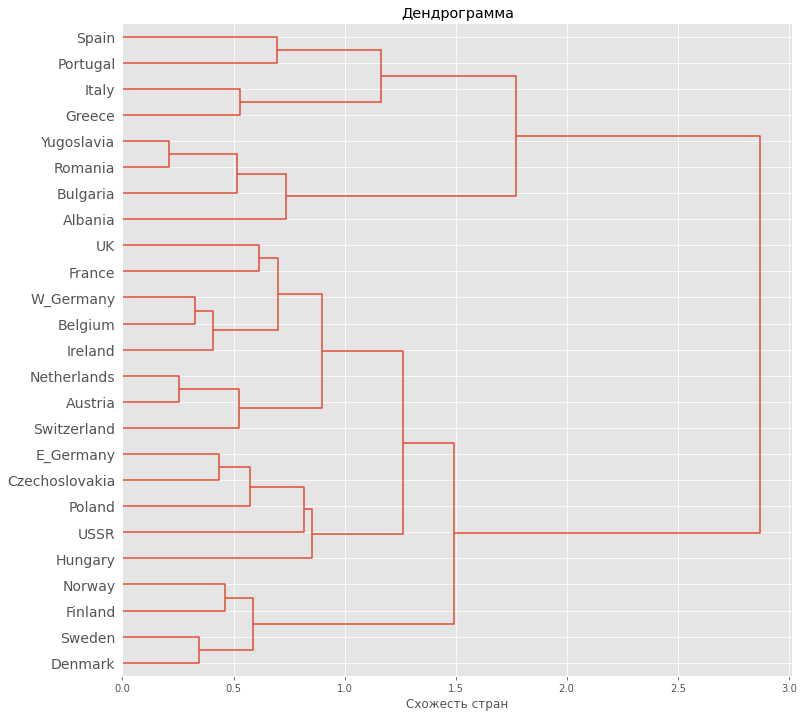

In [23]:
#  кластерный анализ

link_2 = linkage(X_2, 'ward', 'euclidean')
fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(111)
ax1.set_xlabel('Схожесть стран')

ax1.set_title('Дендрограмма')

dn = dendrogram(link_2,
                # массив с названиями объектов для подписи по оси X
                labels=X_2.index.tolist(),
                leaf_font_size = 14, 
                # опция для красивого отображения слишком ветвистой дендрограммы
                truncate_mode='lastp',
                color_threshold=-1,
                # повернуть подписи вертикально
                orientation = "right",
                leaf_rotation=0.)


In [26]:
df['cluster'] = fcluster(link, 5.5, criterion='distance')

In [32]:
df['cluster_2'] = fcluster(link_2, 1.2, criterion='distance')

In [28]:
df['cluster'].sort_values()

Country
Poland            1
USSR              1
Czechoslovakia    1
E_Germany         1
Hungary           1
Sweden            2
Norway            2
Denmark           2
Finland           2
Netherlands       3
W_Germany         3
France            3
UK                3
Switzerland       3
Belgium           3
Austria           3
Ireland           3
Albania           4
Yugoslavia        4
Romania           4
Bulgaria          4
Portugal          5
Greece            5
Spain             5
Italy             5
Name: cluster, dtype: int32

In [33]:
df['cluster_2'].sort_values()

Country
Sweden            1
Norway            1
Denmark           1
Finland           1
Poland            2
USSR              2
Czechoslovakia    2
E_Germany         2
Hungary           2
Netherlands       3
W_Germany         3
France            3
UK                3
Switzerland       3
Belgium           3
Austria           3
Ireland           3
Albania           4
Yugoslavia        4
Romania           4
Bulgaria          4
Portugal          5
Greece            5
Spain             5
Italy             5
Name: cluster_2, dtype: int32

####  Удалено из курса

In [10]:
#  Напоминание: выбор столбца таблицы в Pandas

#  print(df["COKE"])

In [7]:
#  Напоминание: выбор элемента таблицы в Pandas

df["D_PEPSI"][3]

0

Text(22, 2.6, '4 кластера')

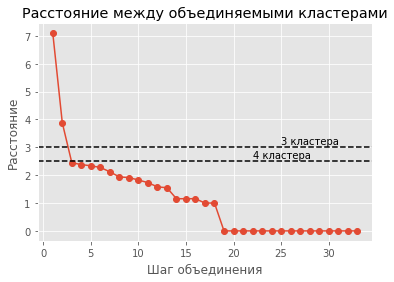

In [23]:
#  Добавляем уровни, на которых останавливаем объединение

dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')
plt.axhline(3, c='k', linestyle='dashed')
plt.axhline(2.52, c='k', linestyle='dashed')
plt.text(25, 3.1, '3 кластера')
plt.text(22, 2.6, '4 кластера')